# Necessary imports

In [88]:
import api_util
from dateutil import parser
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from scipy import stats
from collections import Counter
import numpy as np
# from wordcloud import WordCloud //wordcloud doesn't support 3.11 yet :(

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/siddharth/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/siddharth/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [89]:
df = api_util.video_df
df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,durationSecs,tagCount
0,EuISxGGBflY,Danny Gonzalez,The Lying King,Thanks to SoFi for sponsoring the video! Enter...,"[danny gonzalez, funny, commentary, comedy, re...",2022-12-15T18:00:05Z,2596160.0,168715.0,NaN,7280.0,PT16M32S,hd,false,992.0,9
1,6sh2Ib3DklI,Danny Gonzalez,I Tried Walmart's Terrifying Metaverse Experience,Thanks to ExpressVPN for sponsoring this video...,"[danny gonzalez, funny, commentary, comedy, re...",2022-11-22T18:00:07Z,4044059.0,204888.0,NaN,11690.0,PT23M29S,hd,false,1409.0,9
2,_tgGmYerbB4,Danny Gonzalez,Trying To Find The Worst iPhone Game 2,edited by Jake Mayer https://www.instagram.com...,"[danny gonzalez, funny, commentary, comedy, re...",2022-10-27T16:00:24Z,4432610.0,221027.0,NaN,9329.0,PT29M4S,hd,false,1744.0,9
3,zCoMjByGJZw,Danny Gonzalez,I Tried Ghost Hunting To See If It's Fake,spooky scary stuff\n\nshot by https://www.inst...,"[danny gonzalez, funny, commentary, comedy, re...",2022-10-01T16:00:38Z,7448080.0,387921.0,NaN,17909.0,PT25M45S,hd,false,1545.0,9
4,H2fHTJZqaKA,Danny Gonzalez,The Insane Story Of The Most Dangerous Movie E...,Thanks to ExpressVPN for sponsoring this video...,"[danny gonzalez, funny, commentary, comedy, re...",2022-09-24T17:00:07Z,3041358.0,179685.0,NaN,5677.0,PT19M23S,hd,false,1163.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,GD43C6CvdVQ,Danny Gonzalez,The 9 Friends Everyone Has - Danny Gonzalez,We all know these 9 types of people.\nFollow m...,"[vine, danny gonzalez, buzzfeed, funny list, l...",2014-12-03T00:55:12Z,247085.0,13963.0,NaN,775.0,PT2M7S,hd,false,127.0,10
266,qvMOO4-JSeg,Danny Gonzalez,Go Dumb - Danny Gonzalez,This is a video I made a while ago for an old ...,"[danny gonzalez, vine, comedy, hilarious, popu...",2014-10-10T20:45:37Z,277094.0,11995.0,NaN,427.0,PT56S,hd,false,56.0,10
267,WRe_yup6Nw0,Danny Gonzalez,The Dying Squid - Danny Gonzalez,This is a video I made a while ago for an old ...,"[dance, funny, song, hilarious, danny gonzalez...",2014-10-03T16:21:36Z,552452.0,18275.0,NaN,1264.0,PT2M13S,hd,false,133.0,8
268,wtiEuGdHAIo,Danny Gonzalez,Don't Do Your Homework - Danny Gonzalez,This is a video I made a while ago on a differ...,"[homework, funny, vine, danny gonzalez, music ...",2014-10-03T03:54:27Z,459896.0,18179.0,NaN,1496.0,PT50S,hd,false,50.0,7


# Data Pre-Processing

### Checking Data Types

In [90]:
df.dtypes

video_id           object
channelTitle       object
title              object
description        object
tags               object
publishedAt        object
viewCount         float64
likeCount         float64
favouriteCount    float64
commentCount      float64
duration           object
definition         object
caption            object
durationSecs      float64
tagCount            int64
dtype: object

### Checking for null values

In [91]:
df.isnull().any()

video_id          False
channelTitle      False
title             False
description       False
tags              False
publishedAt       False
viewCount         False
likeCount         False
favouriteCount     True
commentCount      False
duration          False
definition        False
caption           False
durationSecs      False
tagCount          False
dtype: bool

### Handling null tags

In [92]:
df['tags'].fillna('No tags', inplace = True)
df[numeric_cols].fillna(0,inplace=True)

/var/folders/zd/l48_d9f11dd862mlr36br9gr0000gn/T/ipykernel_71435/1767721326.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_cols].fillna(0,inplace=True)


### Converting certain columns to numeric

In [93]:
numeric_cols = ['viewCount', 'likeCount', 'favouriteCount', 'commentCount']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

### Converting duration to seconds

In [94]:
import isodate
df['durationSecs'] = df['duration'].apply(lambda x: isodate.parse_duration(x))
df['durationSecs'] = df['durationSecs'].astype('timedelta64[s]')

In [95]:
df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,durationSecs,tagCount
0,EuISxGGBflY,Danny Gonzalez,The Lying King,Thanks to SoFi for sponsoring the video! Enter...,"[danny gonzalez, funny, commentary, comedy, re...",2022-12-15T18:00:05Z,2596160.0,168715.0,NaN,7280.0,PT16M32S,hd,false,992.0,9
1,6sh2Ib3DklI,Danny Gonzalez,I Tried Walmart's Terrifying Metaverse Experience,Thanks to ExpressVPN for sponsoring this video...,"[danny gonzalez, funny, commentary, comedy, re...",2022-11-22T18:00:07Z,4044059.0,204888.0,NaN,11690.0,PT23M29S,hd,false,1409.0,9
2,_tgGmYerbB4,Danny Gonzalez,Trying To Find The Worst iPhone Game 2,edited by Jake Mayer https://www.instagram.com...,"[danny gonzalez, funny, commentary, comedy, re...",2022-10-27T16:00:24Z,4432610.0,221027.0,NaN,9329.0,PT29M4S,hd,false,1744.0,9
3,zCoMjByGJZw,Danny Gonzalez,I Tried Ghost Hunting To See If It's Fake,spooky scary stuff\n\nshot by https://www.inst...,"[danny gonzalez, funny, commentary, comedy, re...",2022-10-01T16:00:38Z,7448080.0,387921.0,NaN,17909.0,PT25M45S,hd,false,1545.0,9
4,H2fHTJZqaKA,Danny Gonzalez,The Insane Story Of The Most Dangerous Movie E...,Thanks to ExpressVPN for sponsoring this video...,"[danny gonzalez, funny, commentary, comedy, re...",2022-09-24T17:00:07Z,3041358.0,179685.0,NaN,5677.0,PT19M23S,hd,false,1163.0,9


### Add tag count

In [96]:
df['tagCount'] = df['tags'].apply(lambda x: 0 if x is None else len(x))
df.head(3)

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,durationSecs,tagCount
0,EuISxGGBflY,Danny Gonzalez,The Lying King,Thanks to SoFi for sponsoring the video! Enter...,"[danny gonzalez, funny, commentary, comedy, re...",2022-12-15T18:00:05Z,2596160.0,168715.0,NaN,7280.0,PT16M32S,hd,false,992.0,9
1,6sh2Ib3DklI,Danny Gonzalez,I Tried Walmart's Terrifying Metaverse Experience,Thanks to ExpressVPN for sponsoring this video...,"[danny gonzalez, funny, commentary, comedy, re...",2022-11-22T18:00:07Z,4044059.0,204888.0,NaN,11690.0,PT23M29S,hd,false,1409.0,9
2,_tgGmYerbB4,Danny Gonzalez,Trying To Find The Worst iPhone Game 2,edited by Jake Mayer https://www.instagram.com...,"[danny gonzalez, funny, commentary, comedy, re...",2022-10-27T16:00:24Z,4432610.0,221027.0,NaN,9329.0,PT29M4S,hd,false,1744.0,9


In [97]:
df.columns

Index(['video_id', 'channelTitle', 'title', 'description', 'tags',
       'publishedAt', 'viewCount', 'likeCount', 'favouriteCount',
       'commentCount', 'duration', 'definition', 'caption', 'durationSecs',
       'tagCount'],
      dtype='object')

# Exploring

### Best performing videos

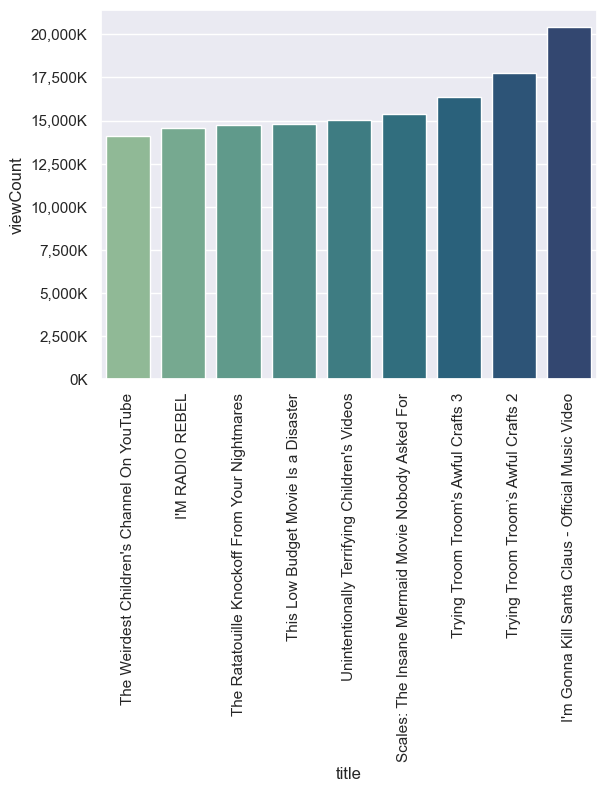

In [98]:
sns.set_theme()
ax = sns.barplot(x = 'title', y = 'viewCount', data = df.sort_values('viewCount', ascending=False)[:9][::-1],palette="crest")
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

### Worst performing videos

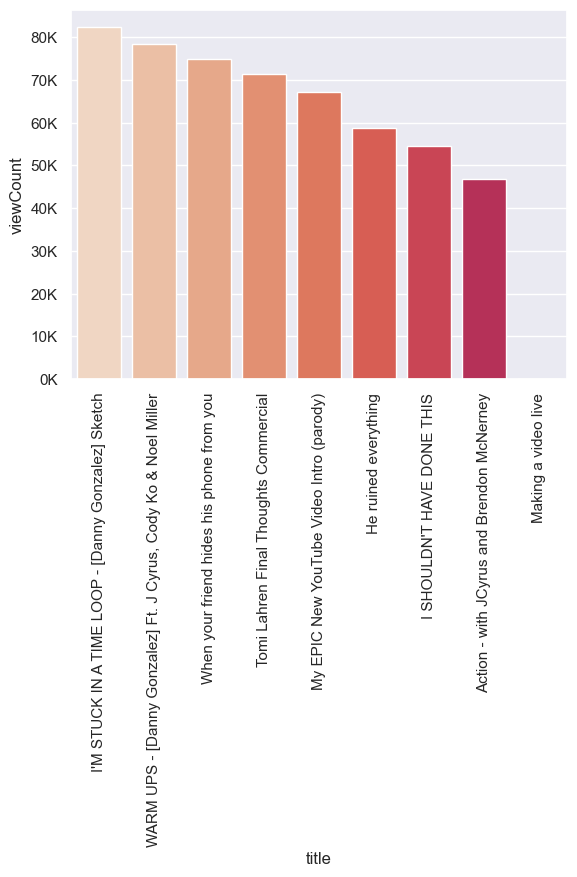

In [99]:
palette = sns.color_palette("rocket",n_colors=15)
palette.reverse()
ax = sns.barplot(x = 'title', y = 'viewCount', data = df.sort_values('viewCount', ascending=True)[:9][::-1], palette=palette)
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

### View distribution per video

<AxesSubplot: xlabel='viewCount', ylabel='channelTitle'>

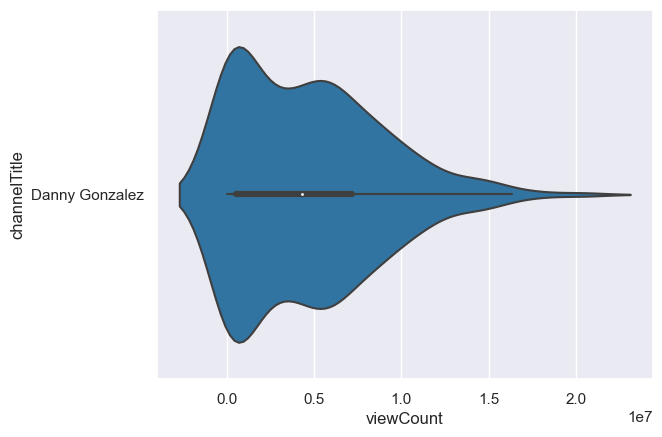

In [100]:
sns.violinplot(y=df['channelTitle'], x=df['viewCount'], palette='tab10')

### Views vs. likes

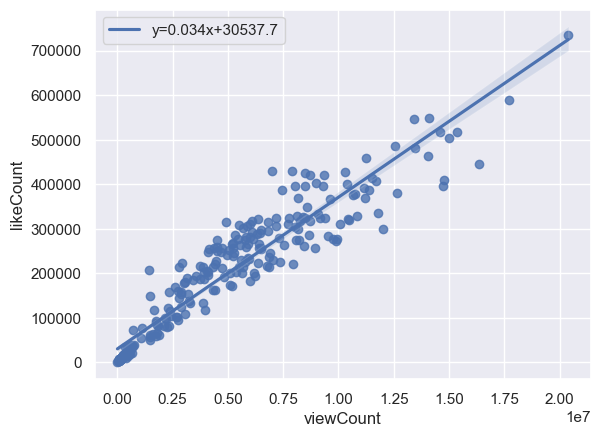

In [101]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['viewCount'], df['likeCount'])
ax = sns.regplot(x=df['viewCount'], y=df['likeCount'], line_kws={'label':"y={0:.3f}x+{1:.1f}".format(slope,intercept)})
ax.legend()
plt.show()

### Views vs. comments

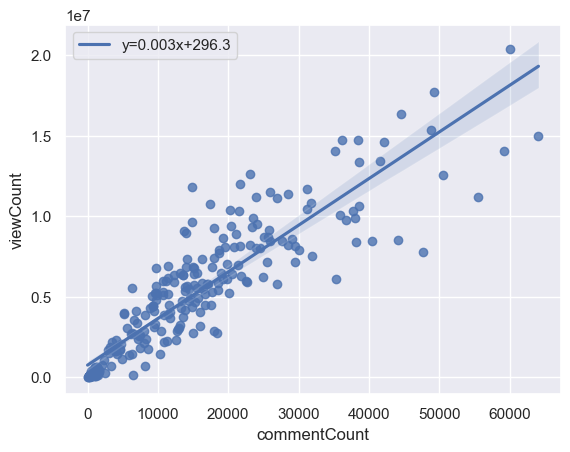

In [102]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['viewCount'], df['commentCount'])
ax = sns.regplot(y=df['viewCount'], x=df['commentCount'], line_kws={'label':"y={0:.3f}x+{1:.1f}".format(slope,intercept)})
ax.legend()
plt.show()

### Views vs. duration

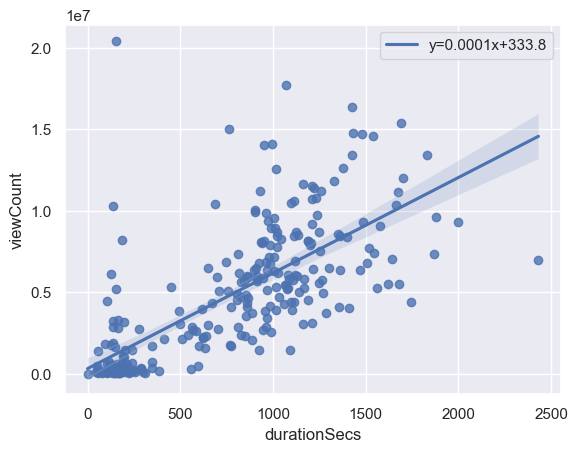

In [103]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['viewCount'], df['durationSecs'])
ax = sns.regplot(y=df['viewCount'], x=df['durationSecs'], line_kws={'label':"y={0:.4f}x+{1:.1f}".format(slope,intercept)})
ax.legend()
plt.show()

### Video duration

<AxesSubplot: xlabel='durationSecs', ylabel='Count'>

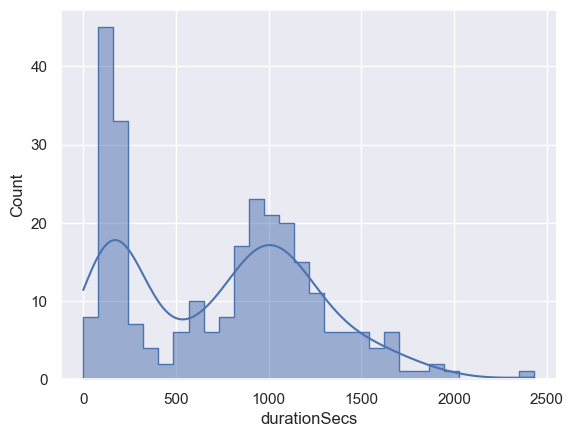

In [104]:
sns.histplot(data = df, x = 'durationSecs', bins=30,kde=True,element="step")

### Most used tags

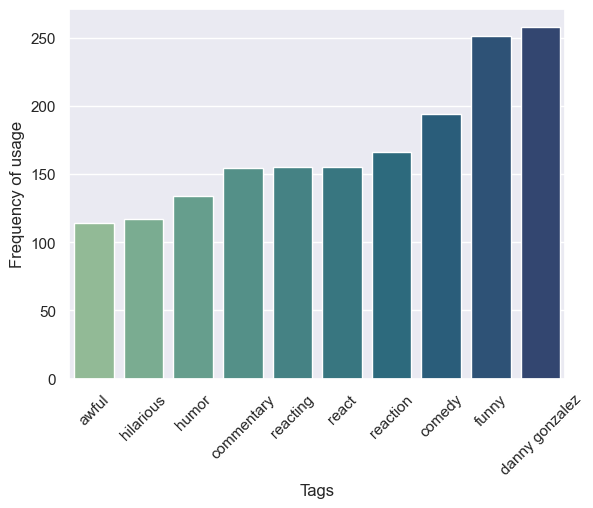

In [105]:
freq=Counter()

for tag in df['tags']:
    freq.update(tag)

freq=dict(freq.most_common(10))

keys = list(freq.keys())[::-1]
vals = [freq[k] for k in keys]
ax = sns.barplot(x=keys, y=vals, palette='crest')
ax.set(xlabel='Tags', ylabel='Frequency of usage')
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

### Average view count per tag

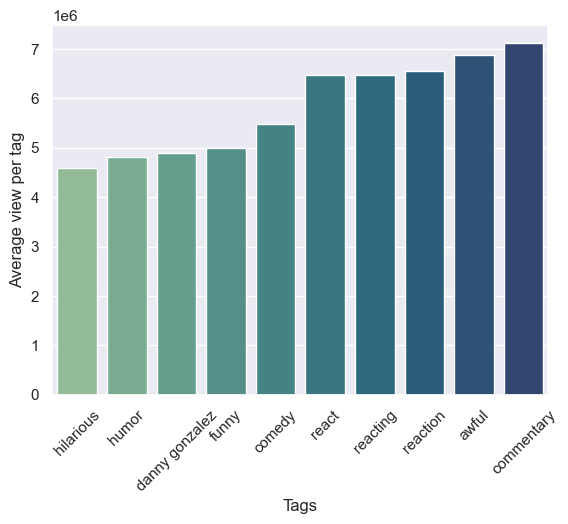

In [106]:
avg_views_per_tag = {}

for tag in freq.keys():
    count=0
    views=0
    for index, row in df.iterrows():
        if row['tags']=='No tags':
            continue
        elif tag in row['tags']:
            count+=1
            views+=row['viewCount']
    avg_views_per_tag[tag] = views/count

avg_views_per_tag = dict(sorted(avg_views_per_tag.items(), key=lambda item: item[1], reverse=True))

keys = list(avg_views_per_tag.keys())[::-1]
vals = [avg_views_per_tag[k] for k in keys]
ax = sns.barplot(x=keys, y=vals, palette='crest')
ax.set(xlabel='Tags', ylabel='Average view per tag')
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

### View count heatmap of correlation

<AxesSubplot: >

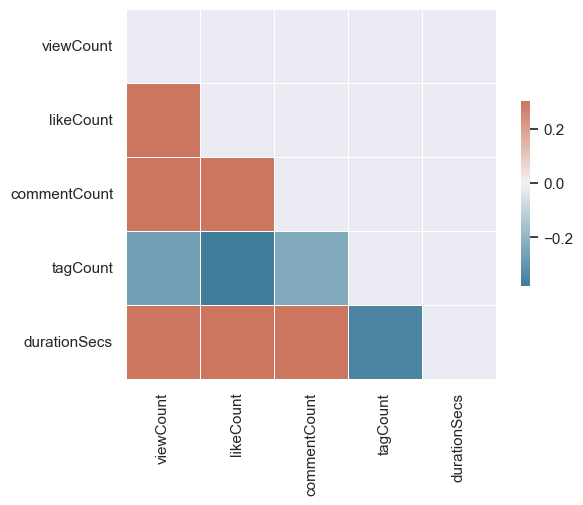

In [108]:
heatmap_cols = ['viewCount', 'likeCount','commentCount','tagCount','durationSecs']
corr=df[heatmap_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots()

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})